Observed Trends:

1. The closer a city is to the equator (a lower absolute value of latitude), the higher the temperature of the city is.
2. Surprisingly, the humidity in a city does not have a strong correlate with the temperature or latitude. Cities across the entire latitude range have similar humidity levels. This observation applies to the cloudiness percentage for each city, and for the wind speed for each city.
3. However, the highest wind speeds appeared farthest away from the equator, and those cities approximately 20 degrees North or South of the equator had the lowest humidity percentages.

In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import openweathermapy.core as owm
from citipy import citipy
from pprint import pprint
import seaborn as sns


#API config key
from config import api_key

In [2]:
# Create latitudes and longitudes

latitude = np.random.uniform(-90,90,2000) # Random list of 2000 items with a range of -90 to +90
longitude = np.random.uniform(-180,180,2000) # Random list of 2000 items with a range of -180 + 180

#print (latitude)
#print (longitude)

In [3]:
# Create initial Cities Dataframe for 10 Latitudes and Longitudes
city_df = pd.DataFrame({"Latitude": latitude, "Longitude": longitude})
city_df.head()

,Latitude,Longitude
0,-66.077809,88.290853
1,52.356347,69.975055
2,-21.543343,42.959799
3,83.597567,-109.241022
4,55.723040,93.307338


In [4]:
# Add additional columns Cities, Temperature, Humidity, Cloudiness and Wind Speed to city_df 
# Note that we used "" to specify initial entry.

city_df["City"] = ""
city_df["Country Code"] = ""
city_df["Temperature"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Humidity"] = ""
#city_df["URL"] = ""
city_df.head()

,Latitude,Longitude,City,Country Code,Temperature,Cloudiness,Wind Speed,Humidity
0,-66.077809,88.290853,,,,,,
1,52.356347,69.975055,,,,,,
2,-21.543343,42.959799,,,,,,
3,83.597567,-109.241022,,,,,,
4,55.723040,93.307338,,,,,,


In [5]:
# Pull the values of Cities for each Latitude and Longitude and append those values in the City column
# Loop through the city_df and run a latitude/longitude search for each city and its respective country code,
# and append the corresponding values

for index, row in city_df.iterrows():
    latitude = row['Latitude']
    longitude = row ["Longitude"]
    
    city_df.set_value(index, "City", citipy.nearest_city(latitude, longitude).city_name)
    city_df.set_value(index, "Country Code", citipy.nearest_city(latitude, longitude).country_code)

city_df = city_df.drop_duplicates(subset=["City","Country Code"], keep="first")


C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [6]:
# Construct the base url to pull the information from openweatherapi
#base_url = "http://api.openweathermap.org/data/2.5/weather"
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

In [7]:
# Loop through the city_df and call the target url to pull the required information
# Print Retrieving Information and Log

print("Beginning Data Retrieval" + "\n" + "------------------------")

for index, row in city_df.iterrows():
    city = row['City']
    country = row ["Country Code"]
    city_country = str(city)+ "," + str(country)
    
    try:
        #current_weather = owm.get_current(city_country, **settings)
        current_weather_url = base_url + "&appid=" + api_key + "&q=" + city_country
        current_weather = requests.get(current_weather_url).json()
        print (current_weather_url)
                
        city_df.set_value(index, "Temperature", current_weather['main']['temp'])
        city_df.set_value(index, "Humidity", current_weather['main']['humidity'])
        city_df.set_value(index, "Cloudiness", current_weather['clouds']['all'])
        city_df.set_value(index, "Wind Speed", current_weather['wind']['speed'])
        #city_df.set_value(index, "URL", current_weather_url)
   
    except:
        city_df.set_value(index, "Temperature", "No Data from API")
        city_df.set_value(index, "Humidity", "No Data from API")
        city_df.set_value(index, "Cloudiness", "No Data from API")
        city_df.set_value(index, "Wind Speed", "No Data from API")
        #city_df.set_value(index, "URL", "No Data from API")
        #print("No Data found")
        

city_df = city_df[["City", "Country Code", "Latitude", "Longitude","Temperature", "Humidity", "Cloudiness", "Wind Speed"]]

city_df.head()


Beginning Data Retrieval
------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=busselton,au


C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=makinsk,kz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=ankazoabo,mg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=yellowknife,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=zykovo,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=severo-kurilsk,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=sentyabrskiy,ru


C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\santo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=victoria,sc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=arraial do cabo,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=yerbogachen,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=cherskiy,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=lensk,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=severnyy,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=ushuaia,ar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=rikitea,pf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=carnarvon,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=toliary,mg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=saint-philippe,re
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=georgetown,sh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=riviere-au-renard,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=butaritari,ki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=attawapiskat,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=belushya guba,ru
http://api.openweathermap.org/data/2.5/weather?units

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=kudymkar,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=hithadhoo,mv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=yankton,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=ixtapa,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=tire,tr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=dikson,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=salalah,om
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=laredo,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b2

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=faya,td
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=bay roberts,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=moree,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=meulaboh,id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=impfondo,cg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=hirara,jp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=san patricio,mx
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=sabang,ph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58d

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=wa,gh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=rungata,ki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=angoche,mz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=de aar,za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=ust-nera,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=chama,zm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=cedar city,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=jiaozhou,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b2

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=ngunguru,nz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=bilma,ne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=indramayu,id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=stykkisholmur,is
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=naze,jp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=milazzo,it
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=luxor,eg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=elliot lake,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd5

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=yumen,cn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=klyuchi,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=alcaniz,es
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=sisimiut,gl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=deputatskiy,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=hirtshals,dk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=burnie,au
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=oum hadjer,td
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=deer lake,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=vila do maio,cv
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=yakima,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=seymchan,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=tripoli,ly
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=omboue,ga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=kure,jp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=basqal,az
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=sibolga,id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=san policarpo,ph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=trento,it
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=ternate,id
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=kanigiri,in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=semiletka,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=rolim de moura,br
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=abalak,ne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=hualmay,pe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=urgut,uz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=savelugu,gh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=ghatal,in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=kurinjippadi,in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=champua,in
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=vao,nc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=kalmar,se
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=turayf,sa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=prince rupert,ca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=luanda,ao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=oktyabrskoye,ru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=avon lake,us
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=gigmoto,ph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=soyo,ao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d8d0cd58dc8681b261670a924&q=scottsburgh,za
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=f9e78d5d

,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,busselton,au,-66.077809,88.290853,62.98,100,44,9.64
1,makinsk,kz,52.356347,69.975055,24.1,85,0,14.67
2,ankazoabo,mg,-21.543343,42.959799,87.37,34,8,9.53
3,yellowknife,ca,83.597567,-109.241022,-14.81,75,90,3.36
4,zykovo,ru,55.723040,93.307338,24.64,89,92,16.35


In [8]:
city_df.to_csv("constructed_city_df.csv", header = True)

In [9]:
# Clean the constructed data frame without "No Data from API"
city_df_clean = city_df[city_df["Temperature"]!="No Data from API"]

city_df_clean
city_df_clean.to_csv("city_df_clean.csv", header = True)

In [10]:
# Checking the data types for our dataframe
#City_Df_Filter.dtypes

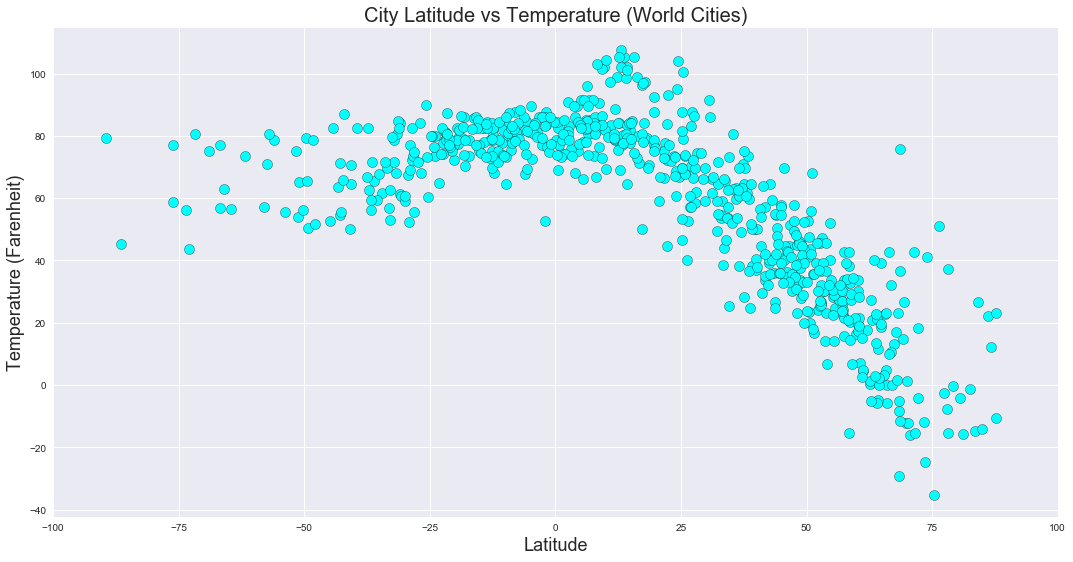

In [15]:
# Build a scatter plot for Temperature (F) vs. Latitude
sns.set()
plt.scatter(city_df_clean["Latitude"], city_df_clean["Temperature"], marker = "o" , color = "aqua", s=100, edgecolor='black')
plt.xlim(-100,100)
# Incorporate the other graph properties
plt.title("City Latitude vs Temperature (World Cities)" , fontsize = 20)
plt.ylabel("Temperature (Farenheit)" , fontsize= 18)
plt.xlabel("Latitude", fontsize=18)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20 
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Images/LatitudeVsTemperature.png")
plt.show()

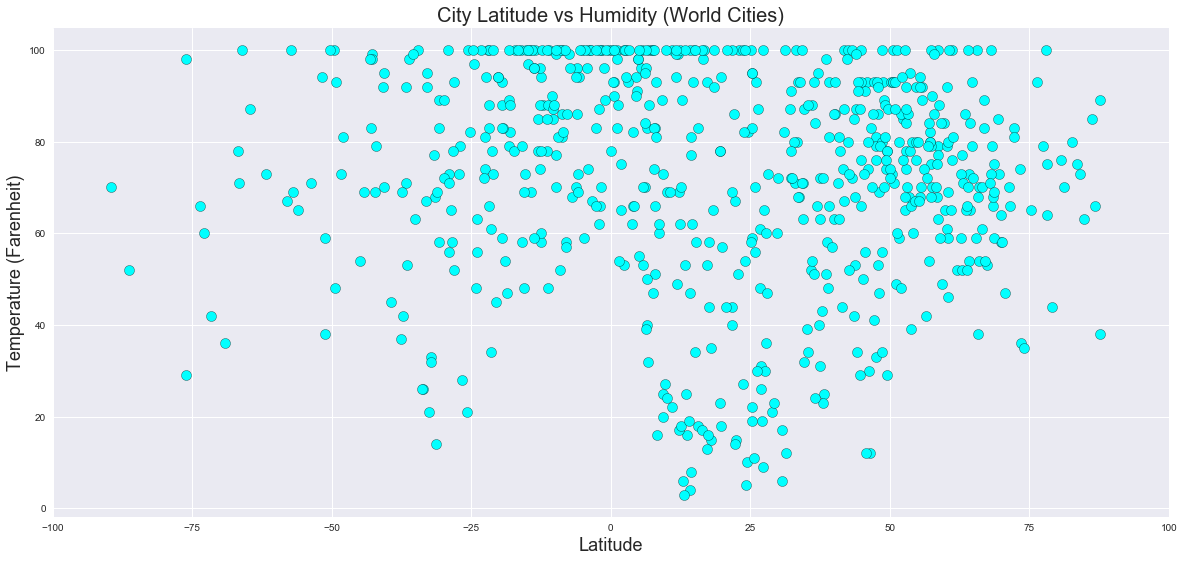

In [12]:
# Build a scatter plot for Humidity (F) vs. Latitude
sns.set()
plt.scatter(city_df_clean["Latitude"], city_df_clean["Humidity"], marker = "o" , color = "aqua", s=100, edgecolor='black')
plt.xlim(-100,100)
# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (World Cities)" , fontsize = 20)
plt.ylabel("Temperature (Farenheit)" , fontsize= 18)
plt.xlabel("Latitude", fontsize=18)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18 
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Images/LatitudeVsHumidity.png")
plt.show()

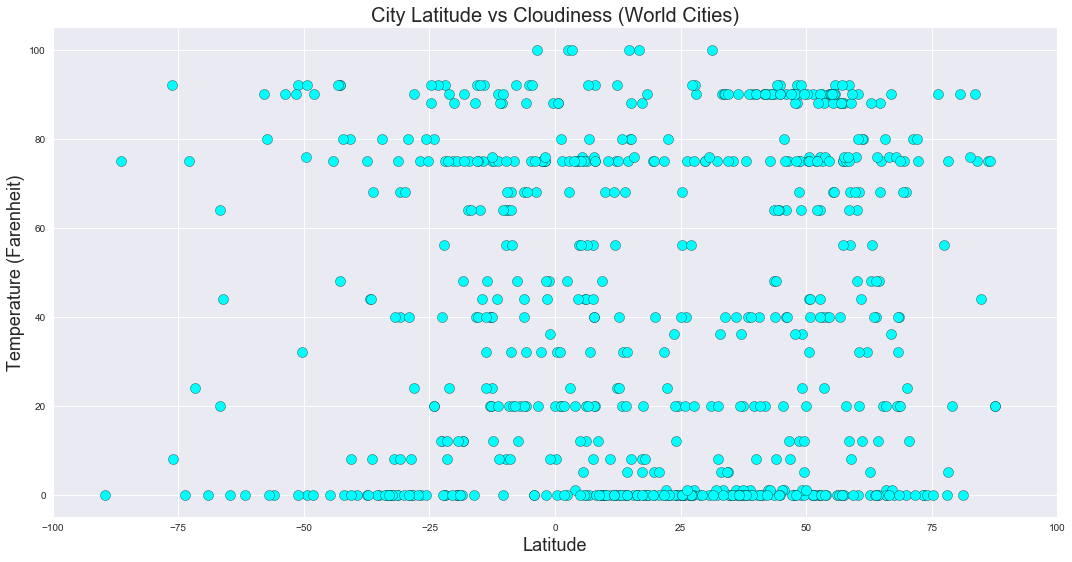

In [13]:
# Build a scatter plot for Cloudiness vs. Latitude
sns.set()
plt.scatter(city_df_clean["Latitude"], city_df_clean["Cloudiness"], marker = "o" , color = "aqua", s=100, edgecolor='black')
plt.xlim(-100,100)
# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (World Cities)" , fontsize = 20)
plt.ylabel("Temperature (Farenheit)" , fontsize= 18)
plt.xlabel("Latitude", fontsize=18)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18 
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Images/LatitudeVsCloudiness.png")
plt.show()

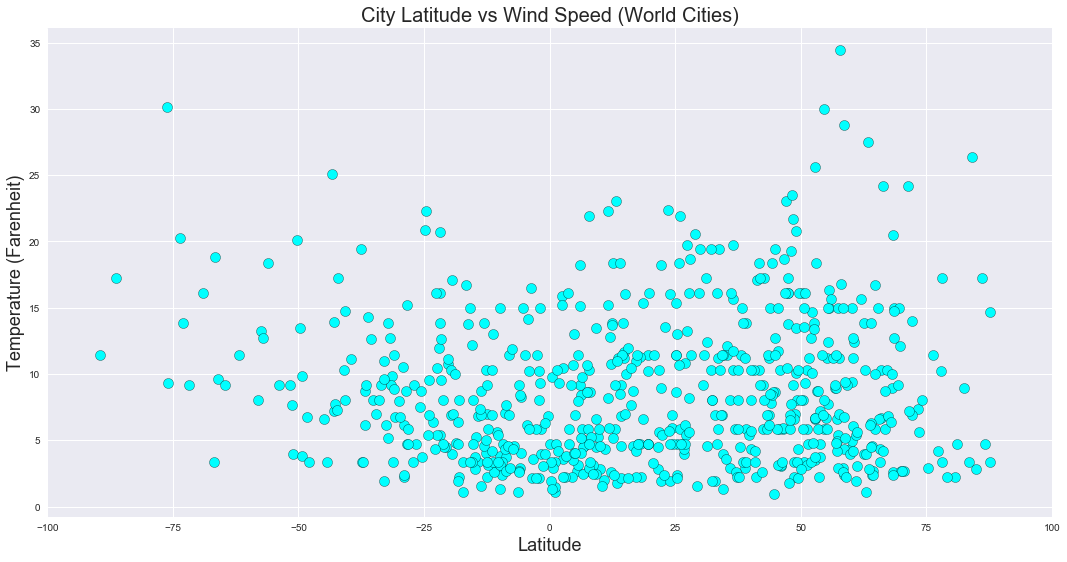

In [14]:
# Build a scatter plot for Wind Speed vs. Latitude
sns.set()
plt.scatter(city_df_clean["Latitude"], city_df_clean["Wind Speed"], marker = "o" , color = "aqua", s=100, edgecolor='black')
plt.xlim(-100,100)
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (World Cities)" , fontsize = 20)
plt.ylabel("Temperature (Farenheit)" , fontsize= 18)
plt.xlabel("Latitude", fontsize=18)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18 
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Images/LatitudeVsWindspeed.png")
plt.show()